In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from math import exp

In [3]:
dataset = pd.read_csv('bank.csv',sep=";")

In [4]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
dataset['y'].replace(['no','yes'],[0,1],inplace=True)
dataset['contact'].replace(['unknown','cellular','telephone'],[0,1,2],inplace=True)
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,1,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,1,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,1,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,0,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,0,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,1,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,0,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,1,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,1,6,feb,129,4,211,3,other,0


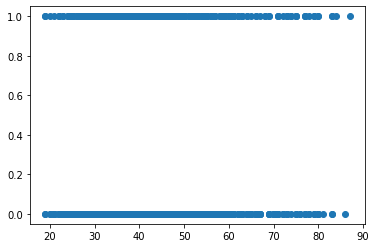

In [6]:
X=dataset['age']
Y=dataset['y']
plt.scatter(X,Y)
plt.show()

In [7]:
train_index = int(0.8 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
Y_train, Y_test = Y[:train_index], Y[train_index:]

In [8]:
X_train

0       30
1       33
2       35
3       30
4       59
        ..
3611    28
3612    50
3613    49
3614    71
3615    31
Name: age, Length: 3616, dtype: int64

In [9]:
X_test

3616    45
3617    42
3618    45
3619    47
3620    60
        ..
4516    33
4517    57
4518    57
4519    28
4520    44
Name: age, Length: 905, dtype: int64

In [10]:
Y_train

0       0
1       0
2       0
3       0
4       0
       ..
3611    0
3612    0
3613    0
3614    0
3615    0
Name: y, Length: 3616, dtype: int64

In [11]:
Y_test

3616    0
3617    0
3618    0
3619    0
3620    0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 905, dtype: int64

In [12]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,1,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,1,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,1,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,0,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,0,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,1,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,0,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,1,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,1,6,feb,129,4,211,3,other,0


In [13]:
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

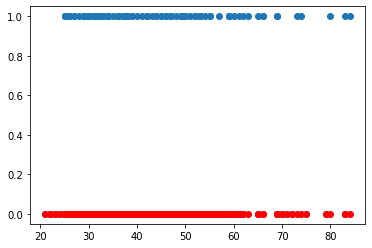

Accuracy = 0.8773480662983425


In [14]:
b0, b1 = logistic_regression(X_train, Y_train)

# Making predictions
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, Y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == Y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")